In [1]:
# Importer les packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
#import plotly.express as px
import numpy as np
import warnings
from datetime import date 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


warnings.filterwarnings('ignore')

In [2]:
# Importer les données
df_global = pd.read_csv("P9 Data Clean.csv")
df_global = df_global.drop(columns=["Unnamed: 0"])
df_global = df_global.set_index(["Zone"])
df_global

,Importation (KTonnes),Population en Milliers,Exportation (KTonnes),Production (KTonnes)
Zone,,,,
Afrique du Sud,1667.0,57009.756,63.0,514.0
Albanie,13.0,2884.169,0.0,38.0
Algérie,275.0,41389.189,0.0,2.0
Allemagne,1514.0,82658.409,646.0,842.0
Angola,42.0,29816.766,0.0,277.0
...,...,...,...,...
Uruguay,33.0,3436.641,3.0,3.0
Venezuela (République bolivarienne du),600.0,29402.484,0.0,25.0
Viet Nam,918.0,94600.648,1.0,291.0


In [3]:
#on va d'utiliser la fonction robust scaler pour normaliser les données vu qui en theorie gere mieux les outliers 
X = df_global[["Exportation (KTonnes)","Population en Milliers","Importation (KTonnes)","Production (KTonnes)"]].values
transformer = RobustScaler().fit(X)
X_scaled = transformer.transform(X)
X_scaled 

array([[ 1.87500000e+00,  1.54038822e+00,  2.35231587e+00,
         4.58878505e+00],
       [-9.37500000e-02, -2.27350858e-01, -1.59453303e-01,
         1.40186916e-01],
       [-9.37500000e-02,  1.03022125e+00,  2.38420653e-01,
        -1.96261682e-01],
       [ 2.00937500e+01,  2.37807200e+00,  2.11996963e+00,
         7.65420561e+00],
       [-9.37500000e-02,  6.52266469e-01, -1.15413819e-01,
         2.37383178e+00],
       [-9.37500000e-02, -3.18431071e-01, -1.79195140e-01,
        -1.49532710e-01],
       [ 2.18750000e-01,  7.59535240e-01,  7.56264237e-01,
         6.53271028e+00],
       [ 6.37500000e+00,  1.11343721e+00,  3.10250569e+00,
        -1.40186916e-01],
       [-9.37500000e-02, -2.25370946e-01, -1.62490509e-01,
         1.12149533e-01],
       [ 1.21875000e+00,  4.81384832e-01,  1.74791192e+00,
        -6.54205607e-02],
       [ 2.34375000e+00, -3.34901354e-02,  4.55580866e-02,
         8.13084112e-01],
       [-9.37500000e-02,  0.00000000e+00, -2.12604404e-02,
      

# Clustering en utilsant CAH

Les données comportent un nombre de pays "maîtrisables" qui permet de commencer par une classification hiérarchique. Algorithme qui a une forte complexité algorithmique en temps et en espace, le clustering hiérarchique est recommandé pour les petits échantillons.

In [4]:
#Clustering hiérarchique: création d'une Matrice des liens selon la Méthode de Ward
Z = linkage(X_scaled, method = 'ward', metric='euclidean')

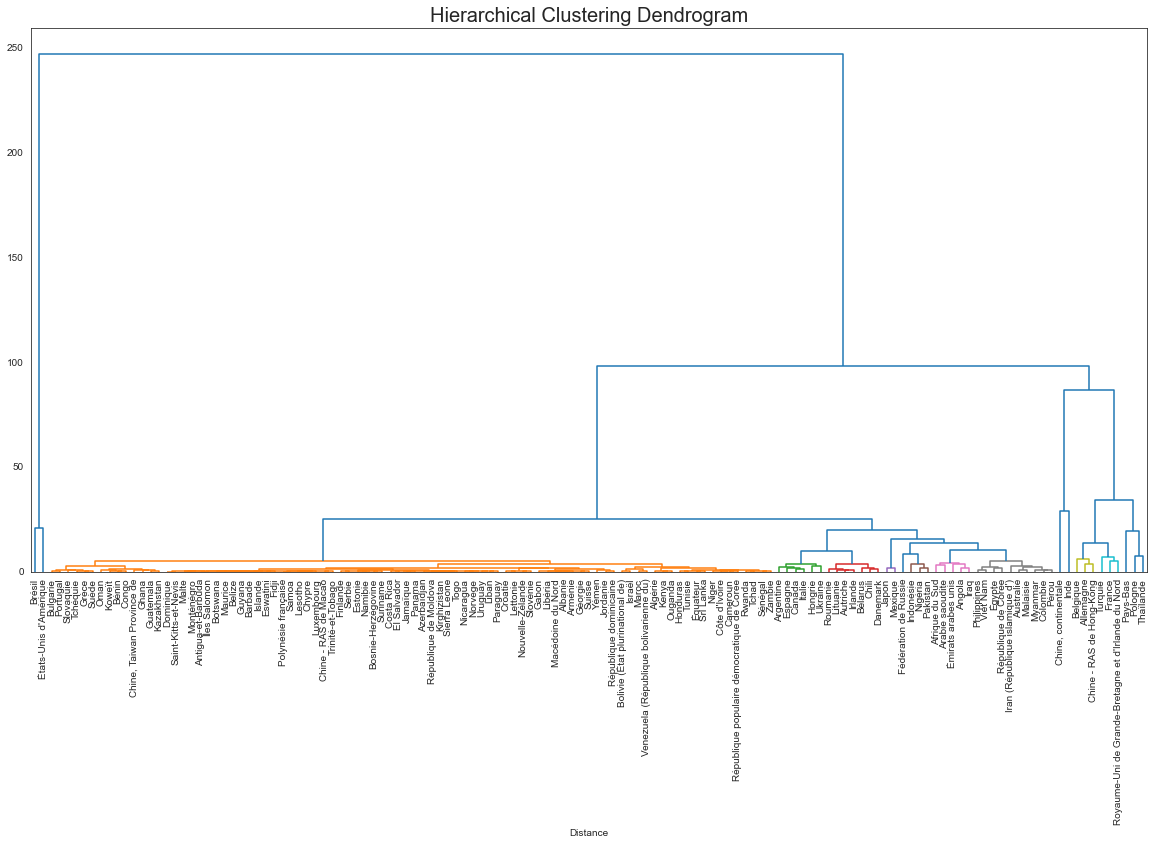

In [5]:
#Affichage d'un premier dendrogramme global
fig =plt.figure(figsize=(20,10))
sns.set_style('white')
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel('Distance')

dendrogram(Z, labels = df_global.index, leaf_font_size=10, color_threshold=7, orientation='top')
plt.show()

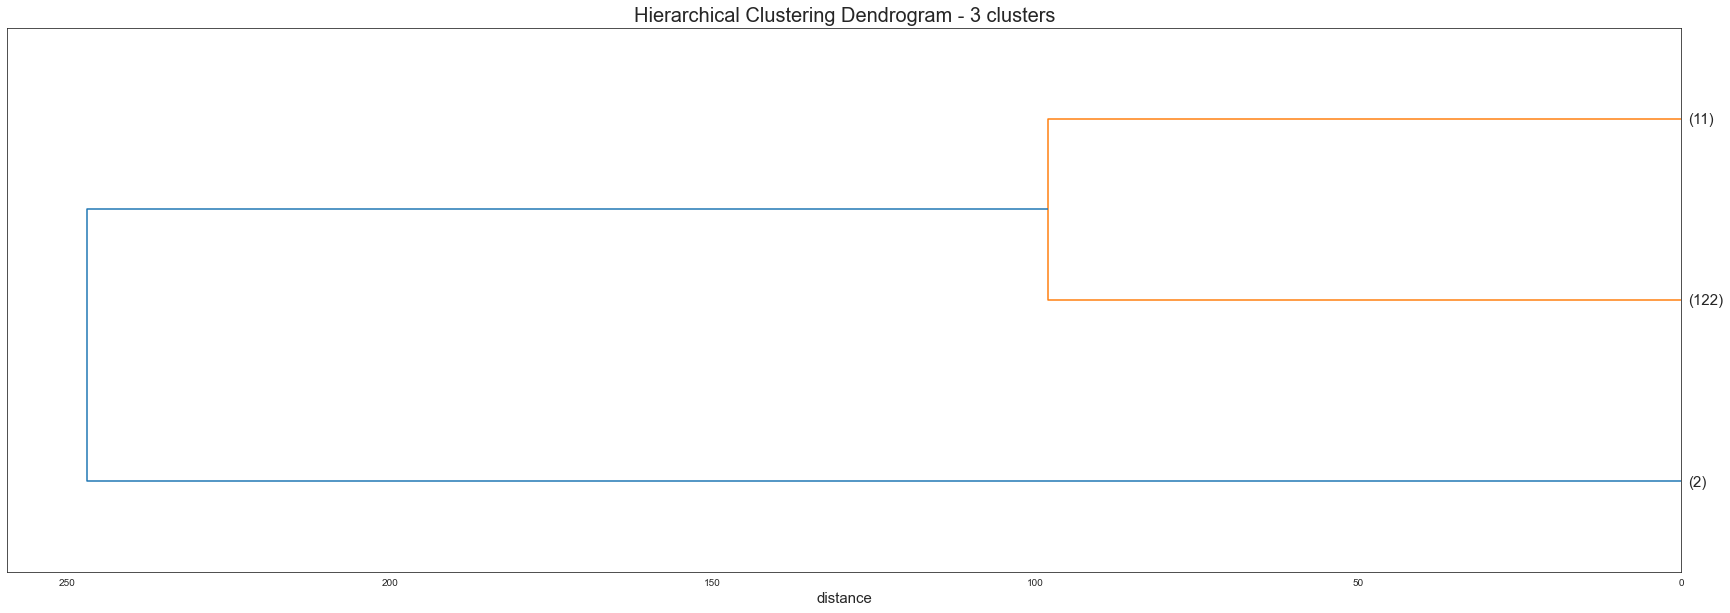

In [6]:
#Coupage du dendrogramme en 3 groupes pour avoir une première idée du partitionnement
fig = plt.figure(figsize=(30,10))
plt.title('Hierarchical Clustering Dendrogram - 3 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)

dendrogram(Z, labels = df_global.index, p=3, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

In [7]:
#Identification des 5 groupes obtenus
groupes_cah = fcluster(Z, 3, criterion='maxclust')
print('Numérotation de nos groupes : ' + str(np.unique(groupes_cah)))

#Index trié des groupes
idg = np.argsort(groupes_cah)

#Affichage des pays selon leurs groupes
df_groupes_cah = pd.DataFrame(df_global.index[idg], groupes_cah[idg]).reset_index()
df_groupes_cah = df_groupes_cah.rename(columns={'index':'Groupe'})

Numérotation de nos groupes : [1 2 3]


In [8]:
#Intégration des groupes dans notre échantillon de départ représenté par le dataframe "df_global"
#Jointure interne nécessaire pour parvenir à agréger nos données
df_groupes_cah = pd.merge(df_global, df_groupes_cah, on='Zone')

In [9]:
#Aperçu des 5 premières lignes
df_groupes_cah.head()

,Zone,Importation (KTonnes),Population en Milliers,Exportation (KTonnes),Production (KTonnes),Groupe
0,Afrique du Sud,1667.0,57009.756,63.0,514.0,2
1,Albanie,13.0,2884.169,0.0,38.0,2
2,Algérie,275.0,41389.189,0.0,2.0,2
3,Allemagne,1514.0,82658.409,646.0,842.0,3
4,Angola,42.0,29816.766,0.0,277.0,2


In [10]:
#Première comparaison des moyennes afin d'identifier le groupe de pays qui peut nous interesser à ce niveau de l'analyse
df_groupes_cah.groupby('Groupe').mean()

,Importation (KTonnes),Population en Milliers,Exportation (KTonnes),Production (KTonnes)
Groupe,,,,
1,18057.500000,266459.289500,3957.500000,63.000000
2,409.286885,24292.764418,23.418033,80.983607
3,3151.363636,290723.073818,643.000000,408.363636


In [11]:
#Préparation de sous-ensembles permettant de caractériser les groupes un à un
df_groupe1_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 1]
df_groupe2_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 2]
df_groupe3_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 3]

In [12]:
df_groupe3_cah

,Zone,Importation (KTonnes),Population en Milliers,Exportation (KTonnes),Production (KTonnes),Groupe
3,Allemagne,1514.0,82658.409,646.0,842.0,3
14,Belgique,463.0,11419.748,656.0,338.0,3
25,Chine - RAS de Hong-Kong,24.0,7306.322,663.0,907.0,3
27,"Chine, continentale",18236.0,1421021.791,576.0,452.0,3
48,France,1750.0,64842.509,501.0,506.0,3
58,Inde,3545.0,1338676.785,4.0,0.0,3
98,Pays-Bas,1100.0,17021.347,1418.0,608.0,3
101,Pologne,2351.0,37953.180,1025.0,55.0,3
109,Royaume-Uni de Grande-Bretagne et d'Irlande du...,1814.0,66727.461,359.0,779.0,3
124,Thaïlande,1676.0,69209.810,796.0,2.0,3


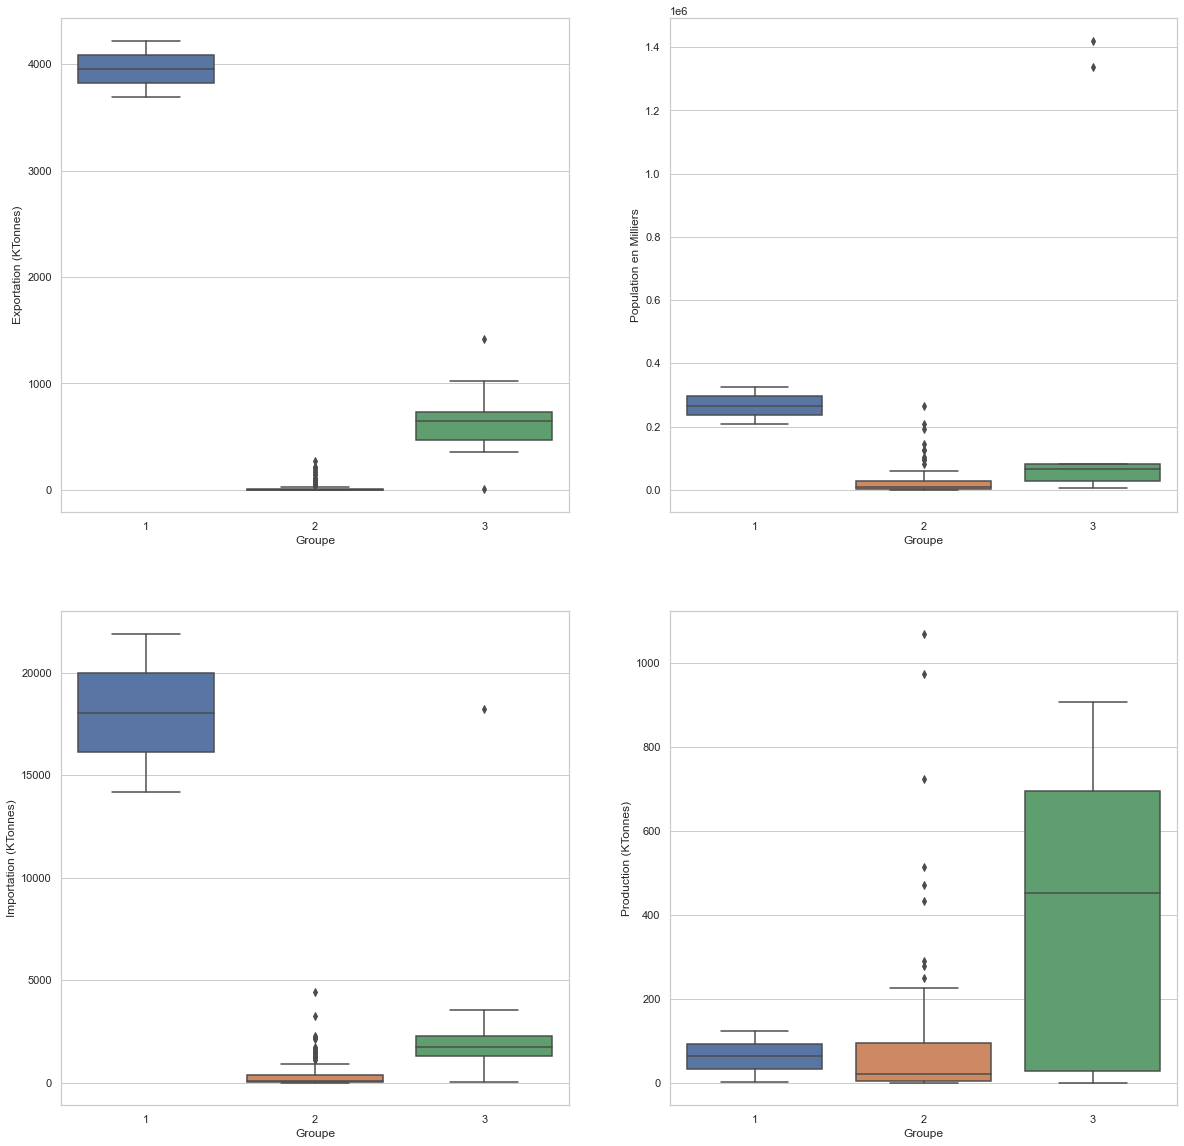

In [13]:
#Comparaison visuelle des groupes par Boxplot, en abscisse les numéros des groupes
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Exportation (KTonnes)')

plt.subplot(222)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Population en Milliers')

plt.subplot(223)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Importation (KTonnes)')

plt.subplot(224)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Production (KTonnes)')

plt.show(block=False)

# Reduction des dimension en utilisant l'ACP

In [14]:
# fonctions pour l'ACP
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[0, i],  
                pca.components_[1, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[0, i] + 0.05,
                pca.components_[1, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)



def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en un df
    X_ = pd.DataFrame(X_projected)
    
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # On définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # On rajoute la color, les clusters et les labels à X_
    X_["clusters"] =  clusters if clusters is not None else "None" 
    X_["labels"] =  labels if labels is not None else "None"
    c_unique_list = X_["clusters"].sort_values().unique()
    c_dict = {j:i+1 for i, j in enumerate(c_unique_list)}
    X_["colors"] = X_["clusters"].apply(lambda i : c_dict[i])

    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()) : 
        # On selectionne le sous DF
        sub_X =X_.loc[X_.clusters == c, : ]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        # On affiche les points
        ax.scatter(    sub_X.iloc[:, x], 
                        sub_X.iloc[:, y], 
                        alpha=alpha, 
                        label = cluster ,
                        cmap="Set1", 
                        marker=marker)
        
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() *1.1
    y_max = np.abs(X_.iloc[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if labels : 
        
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y, labels[i], fontsize='14', ha='center',va='center') 

    # Titre, legend et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    if clusters is not None: 
        plt.legend()
    plt.show()

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [15]:
# Appliquer l'ACP

n_components = 4

#on instancie le pca
pca = PCA(n_components=n_components)

#on applique le pca sur nos données 
pca.fit(X_scaled)

PCA(n_components=4)

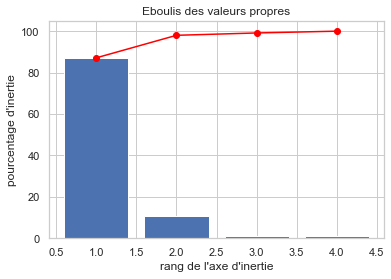

In [16]:
# Eboulis des valeurs propres
display_scree_plot(pca)

plt.show()

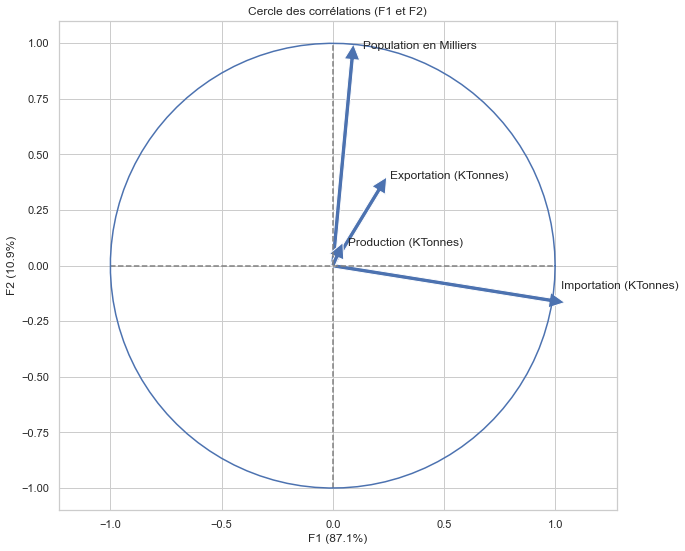

In [17]:
x_y=[0,1]
features=df_global.columns
correlation_graph(pca, x_y,features)

On peut noter une corrélation assez logique entre la production et les facteurs augmentant la consomation

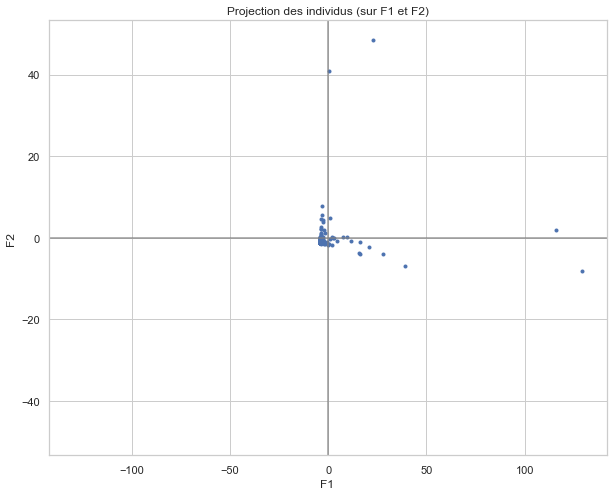

In [18]:
x_y = [0,1]
X_proj = pca.transform(X_scaled)
X_proj = X_proj[:,:2]
display_factorial_planes(X_proj, x_y)

# K-means

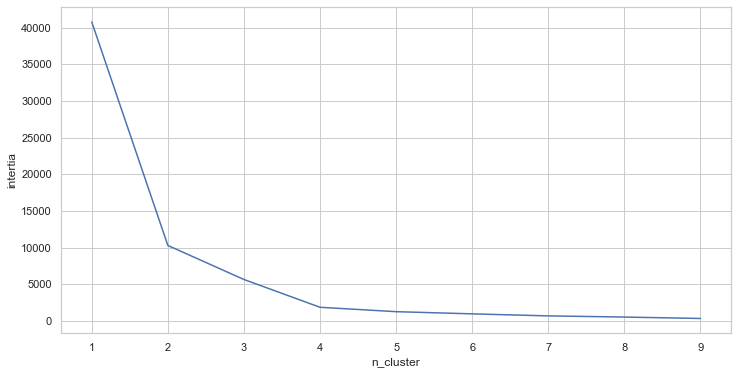

In [19]:
# Utiliser la méthode du coude pour determiner le nombre des clusters
intertia = []
k_list = range(1, 10)
list(k_list)
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X_proj) 
  intertia.append(kmeans.inertia_)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

In [20]:
# D'apres la courbe, on peut avoir 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_proj)

KMeans(n_clusters=3)

In [21]:
kmeans.labels_

array([2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2])

In [22]:
df_global['Cluster']=kmeans.labels_
df_global

,Importation (KTonnes),Population en Milliers,Exportation (KTonnes),Production (KTonnes),Cluster
Zone,,,,,
Afrique du Sud,1667.0,57009.756,63.0,514.0,2
Albanie,13.0,2884.169,0.0,38.0,2
Algérie,275.0,41389.189,0.0,2.0,2
Allemagne,1514.0,82658.409,646.0,842.0,0
Angola,42.0,29816.766,0.0,277.0,2
...,...,...,...,...,...
Uruguay,33.0,3436.641,3.0,3.0,2
Venezuela (République bolivarienne du),600.0,29402.484,0.0,25.0,2
Viet Nam,918.0,94600.648,1.0,291.0,2


In [23]:
df_global[df_global['Cluster']==2]

,Importation (KTonnes),Population en Milliers,Exportation (KTonnes),Production (KTonnes),Cluster
Zone,,,,,
Afrique du Sud,1667.0,57009.756,63.0,514.0,2
Albanie,13.0,2884.169,0.0,38.0,2
Algérie,275.0,41389.189,0.0,2.0,2
Angola,42.0,29816.766,0.0,277.0,2
Antigua-et-Barbuda,0.0,95.426,0.0,7.0,2
...,...,...,...,...,...
Uruguay,33.0,3436.641,3.0,3.0,2
Venezuela (République bolivarienne du),600.0,29402.484,0.0,25.0,2
Viet Nam,918.0,94600.648,1.0,291.0,2


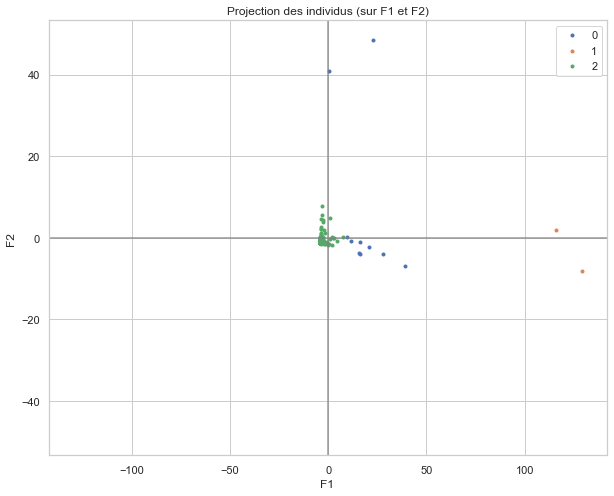

In [24]:
display_factorial_planes(X_proj, x_y,clusters = kmeans.labels_ )

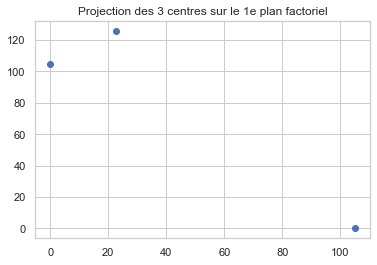

In [25]:
# Affichage des positions des centres de classes
plt.figure()
centroids = kmeans.cluster_centers_
centroids_projected = kmeans.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

In [26]:
# Determiner le nombre de pays par cluster
clusters = kmeans.labels_
crosstab = pd.crosstab('Zone', clusters , dropna=False)
crosstab.rename_axis(columns="cluster", index="Zone", inplace=True)
crosstab

cluster,0,1,2
Zone,,,
Zone,10,2,123


In [27]:
#Première comparaison des moyennes afin d'identifier le groupe de pays qui peut nous interesser à ce niveau de l'analyse
df_groupes_km=df_global
df_groupes_km['Cluster']=kmeans.labels_
df_groupes_km.groupby('Cluster').mean()


,Importation (KTonnes),Population en Milliers,Exportation (KTonnes),Production (KTonnes)
Cluster,,,,
0,3285.100000,313122.635100,671.400000,371.300000
1,18057.500000,266459.289500,3957.500000,63.000000
2,420.707317,24637.761951,26.146341,86.658537


In [31]:
# on prend le cluster 0:
df_groupes_km[df_groupes_km['Cluster'] == 0]

,Importation (KTonnes),Population en Milliers,Exportation (KTonnes),Production (KTonnes),Cluster
Zone,,,,,
Allemagne,1514.0,82658.409,646.0,842.0,0
Belgique,463.0,11419.748,656.0,338.0,0
Chine - RAS de Hong-Kong,24.0,7306.322,663.0,907.0,0
"Chine, continentale",18236.0,1421021.791,576.0,452.0,0
France,1750.0,64842.509,501.0,506.0,0
Inde,3545.0,1338676.785,4.0,0.0,0
Pays-Bas,1100.0,17021.347,1418.0,608.0,0
Pologne,2351.0,37953.180,1025.0,55.0,0
Thaïlande,1676.0,69209.810,796.0,2.0,0


In [29]:
#moyennes etc... par cluster 
CompaClusters = df_global
CompaClusters = df_global.groupby(by="Cluster").mean()
CompaClusters["Ratio"] = (CompaClusters["Importation (KTonnes)"] + CompaClusters["Production (KTonnes)"]- CompaClusters["Exportation (KTonnes)"])/CompaClusters["Population en Milliers"]
CompaClusters

,Importation (KTonnes),Population en Milliers,Exportation (KTonnes),Production (KTonnes),Ratio
Cluster,,,,,
0,3285.100000,313122.635100,671.400000,371.300000,0.009533
1,18057.500000,266459.289500,3957.500000,63.000000,0.053153
2,420.707317,24637.761951,26.146341,86.658537,0.019532


In [30]:
df_global.describe()

,Importation (KTonnes),Population en Milliers,Exportation (KTonnes),Production (KTonnes),Cluster
count,135.000000,1.350000e+02,135.000000,135.000000,135.000000
mean,894.170370,4.958955e+04,132.185185,107.392593,1.837037
std,2766.072566,1.715129e+05,513.784440,204.110158,0.535423
min,0.000000,5.204500e+01,0.000000,0.000000,0.000000
25%,23.500000,3.722678e+03,0.000000,3.000000,2.000000
50%,118.000000,9.845320e+03,3.000000,23.000000,2.000000
75%,682.000000,3.434122e+04,32.000000,110.000000,2.000000
max,21914.000000,1.421022e+06,4223.000000,1069.000000,2.000000
